# Hepatitis Predictor

Predict if a patient will live of die based on available data using ML

## Workflow

* Data Prep
* EDA
* Feature Selection
* BUild Model
* Interpret Model
* Serialisation
* Deployment

Data collected from:
https://archive.ics.uci.edu/ml/datasets/hepatitis

Feature Names
1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
-- see the note below
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!ls

__pycache__                         hepatitis_mortality_predcitor.ipynb
app.py                              knn_hepB_model.pkl
confusionMatrxiUpdated.jpg          logistic_regression_hepB_model.pkl
data                                managed_db.py
dt_hepB_model.pkl                   usersdata.db
hep_decision_tree_plot.png


In [5]:
#Load our data set
df=pd.read_csv("data/hepatitis.data")

In [6]:
#Preview the top of the data set
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [7]:
col_names = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA",
 "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN",
 "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

In [8]:
df = pd.read_csv("data/hepatitis.data", names=col_names)

In [9]:
df.head()
#NOte the class values are 1 for die and 2 for live

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [10]:
#Clean the column names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [11]:
# Convert cols to lowercase
df.columns.str.lower().str.replace(' ', '_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [13]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [14]:
#let's check the data types and make changes where necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

In [15]:
# Replace ? with 0
df = df.replace('?', 0)

In [16]:
df.head(2)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1


In [17]:
#How many columns have an object datatype

sum(df.dtypes == 'object')

15

In [18]:
#columns we want to convert to numerical dtype
df.columns[df.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [19]:
#change columns identified to int except bilirubin and albumin which are already floats
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [20]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [21]:
#check the dytpes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int64  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int64  
 6   malaise          155 non-null    int64  
 7   anorexia         155 non-null    int64  
 8   liver_big        155 non-null    int64  
 9   liver_firm       155 non-null    int64  
 10  spleen_palpable  155 non-null    int64  
 11  spiders          155 non-null    int64  
 12  ascites          155 non-null    int64  
 13  varices          155 non-null    int64  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    int64  
 16  sgot             155 non-null    int64  
 17  albumin         

In [22]:
#check size of dataset
df.shape

(155, 20)

In [23]:
#check for missing values
df.isna().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [24]:
df.to_csv('clean_hep_dataset.csv', index=False)

## Exploratory Data Analysis

* Descriptive analytics

In [25]:
#Let's review basic statistics
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [41]:
#let's check for any imbalance of the dataset
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

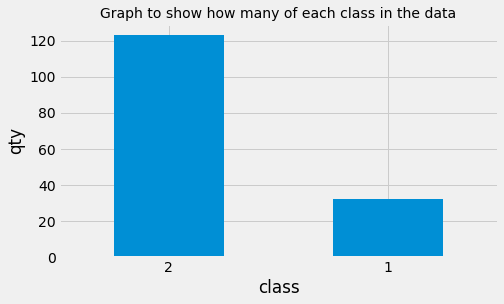

In [27]:
#Yes looks like there is an imbalance in the class sizes. Let's quickly visualise this. 
plt.figure(figsize=(7,4))
df['class'].value_counts().plot(kind="bar");
plt.title("Graph to show how many of each class in the data", fontsize=14)
plt.xticks(rotation=0);
plt.xlabel("class")
plt.ylabel("qty");


In [28]:
#How many males(1) and females(2) do we have
sex = df.sex.value_counts()
sex

1    139
2     16
Name: sex, dtype: int64

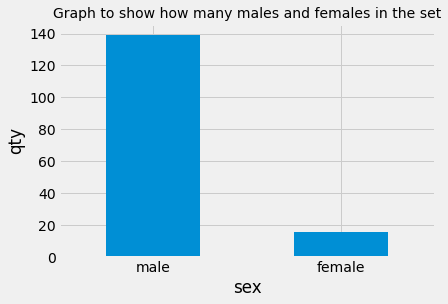

In [29]:
sex.plot(kind="bar")
plt.title("Graph to show how many males and females in the set", fontsize=14)
positions=(0,1)
labels = ("male", "female")
plt.xticks(positions, labels, rotation=0)
plt.xlabel("sex")
plt.ylabel("qty");

We have more males than females in the dataset

In [30]:
#Let's see how age and sex differs 
df.groupby(["age", "sex"]).size().to_frame().head(8)

0
age sex   
7   1    1
20  1    2
    2    1
22  1    1
    2    1
23  1    4
24  1    2
25  1    2

In [31]:
#Frequency distribution using Age Range
df.age.max()

78

In [32]:
df.age.min()

7

In [33]:
labels = ["< 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70 <"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()

In [34]:
freq_df = freq_df.reset_index(name='count')

In [35]:
freq_df

,age,count
0,< 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 <,2


In [36]:
freq_df.to_csv("freq_df_hep_dataset.csv", index=False)

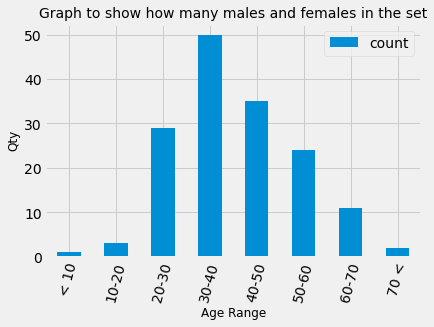

In [119]:
#Plot the number of patients in each age range as a bar chart
freq_df.plot(kind="bar")
plt.title("Graph to show number of patients in each age bracket", fontsize=14)
positions=(range(0, 8))

plt.xticks(positions, labels, rotation=75)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Qty", fontsize=12);

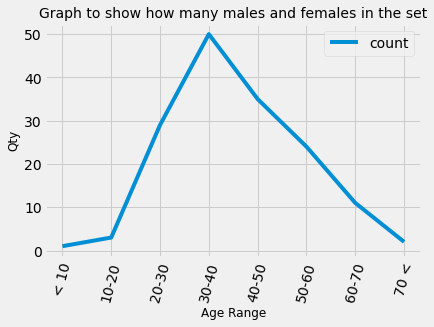

In [125]:
#Plot the number of patients in each age range as a line chart
freq_df.plot(kind="line");
plt.title("Graph to show number of patients in each age bracket", fontsize=14)
positions=(range(0, 8))

plt.xticks(positions, labels, rotation=75)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Qty", fontsize=12);

**Narrative** \
The highest prevalence of Hepatitis is from 30-40 followed by 40-50. \
The lowest prevalence is under 10 and above 70

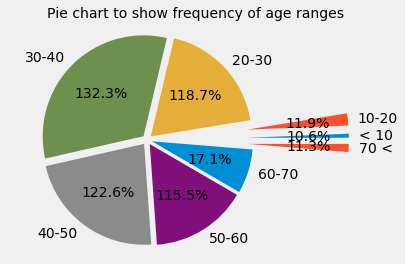

In [144]:
#Pie chart 
labels = ["< 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70 <"]
explode = (1, 1, 0.05, 0.05, 0.05, 0.05, 0.05, 1)

fig1, ax1 = plt.subplots()
ax1.pie(freq_df['count'], explode=explode, labels=labels, autopct='1%.1f%%')
ax1.axis('equal')
plt.title("Pie chart to show frequency of age ranges", fontsize=14)
plt.show()

### Outliers

**Types of Outlier**
* Univariate Analysis
* Multivariate Analysis

**Methods**
* Boxplot(univariate)
* Scatterplot(Multi)
* Z-score
* Interquartile range


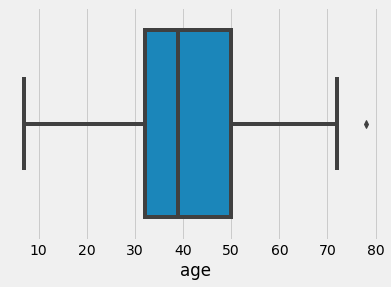

In [146]:
#Use boxplot for univariate outlier detection
#start with age
sns.boxplot(df.age);

In [150]:
#let's look at the outlier shown on the boxplot
df[df.age == df.age.max()]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


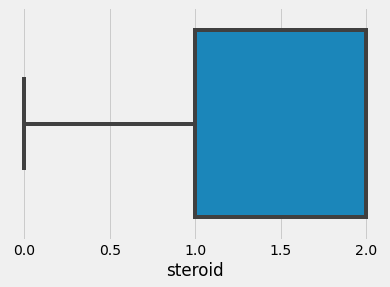

In [151]:
#boxplot of steroid
sns.boxplot(df.steroid)
### noobvious outliers

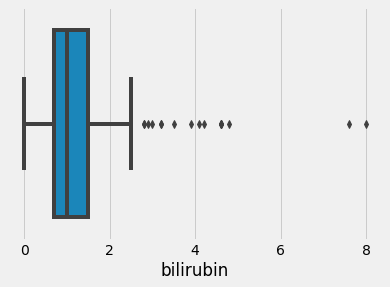

In [152]:
sns.boxplot(df.bilirubin)

In [160]:
#possiby 19 outliers here??
df[df.bilirubin > 2.3].bilirubin.value_counts().sum()

19

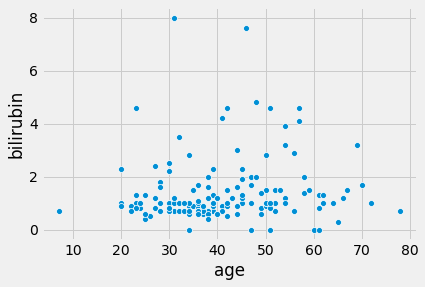

In [165]:
#plot a scatter chart of bilirubin against age
sns.scatterplot(x= df["age"], y=df["bilirubin"])
#This shows som bilirubin values of zero that are not statistically outliers but may be non entries for other reasons
#We could investigate whether a bilirubin score of zero is acceptable. If not this could raise our outlier threshold. 

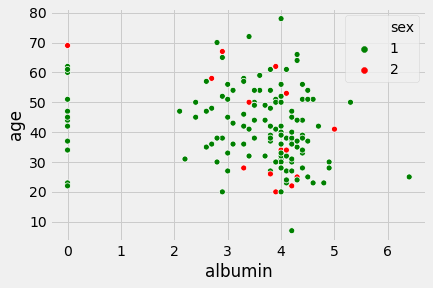

In [167]:
#plot a scatter chart of albumin against age with 
sns.scatterplot(x=df.albumin, y=df.age, hue=df.sex, palette=['green', 'red'], data=df)

This corresponds with our prior knowledge that we have many mor males in the data set than females

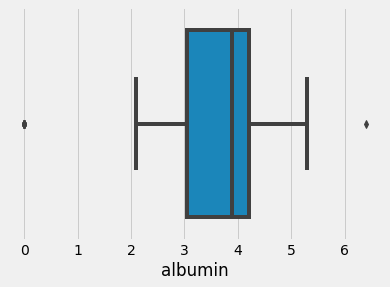

In [169]:
sns.boxplot(df.albumin);
#agrees with the scatter plot that the albumin scores of 0 and above 6 could be outliers

Using Interquartlie Range(IQR)

+ H-Spread / Mid_spread
+ Measures the statistical dispersion / spread
+ IQR = quantile 3(75) - quantile 1(25)


In [170]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [171]:
#Now use our IQR formula in the summary above
IQR = q3 - q1

In [172]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [173]:
#The above figures can also be deduced by subtracting the 25% form the 75% in the describe stats call. 
#We can also see that the majority of features have a yes / no value represented by 1 or 2. Hence the IQR vals. 
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [177]:
### Get the actual datapoint that is an outlier
(df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


Narative
+ The data points with True are the outliers

Solutions
+ Remove
+ Change
+ Ignore

In [178]:
df_no_outlier = df[~((df < (q1 - 1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [181]:
print(df_no_outlier.shape, df.shape)
#Using IQR reduces our dataset dramatically. For now we'll ignore them.

(43, 20) (155, 20)


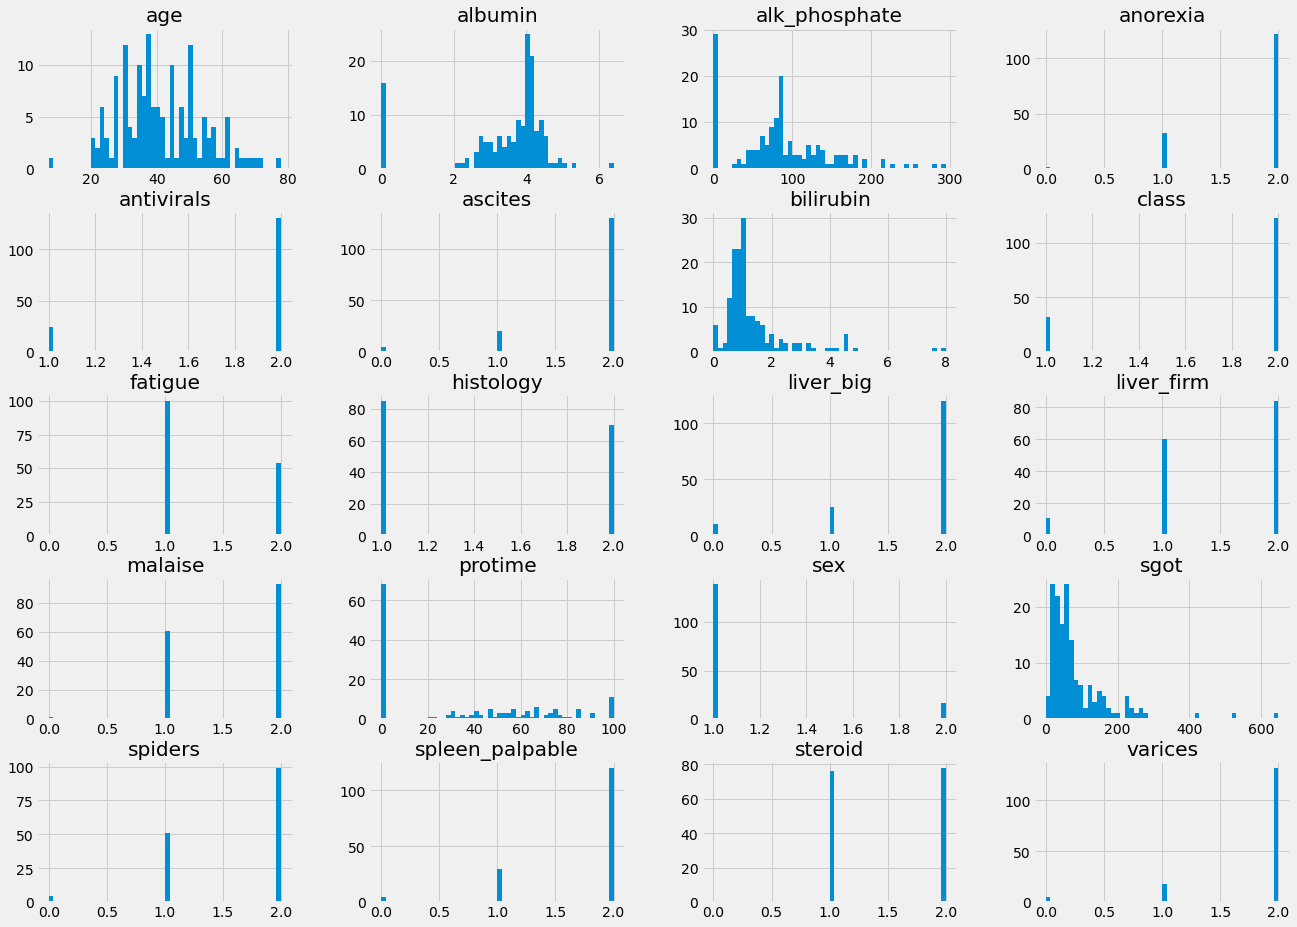

In [183]:
#show histograms for each feature without outlier removal. 
df.hist(bins=50, figsize=(20, 15))
plt.show()

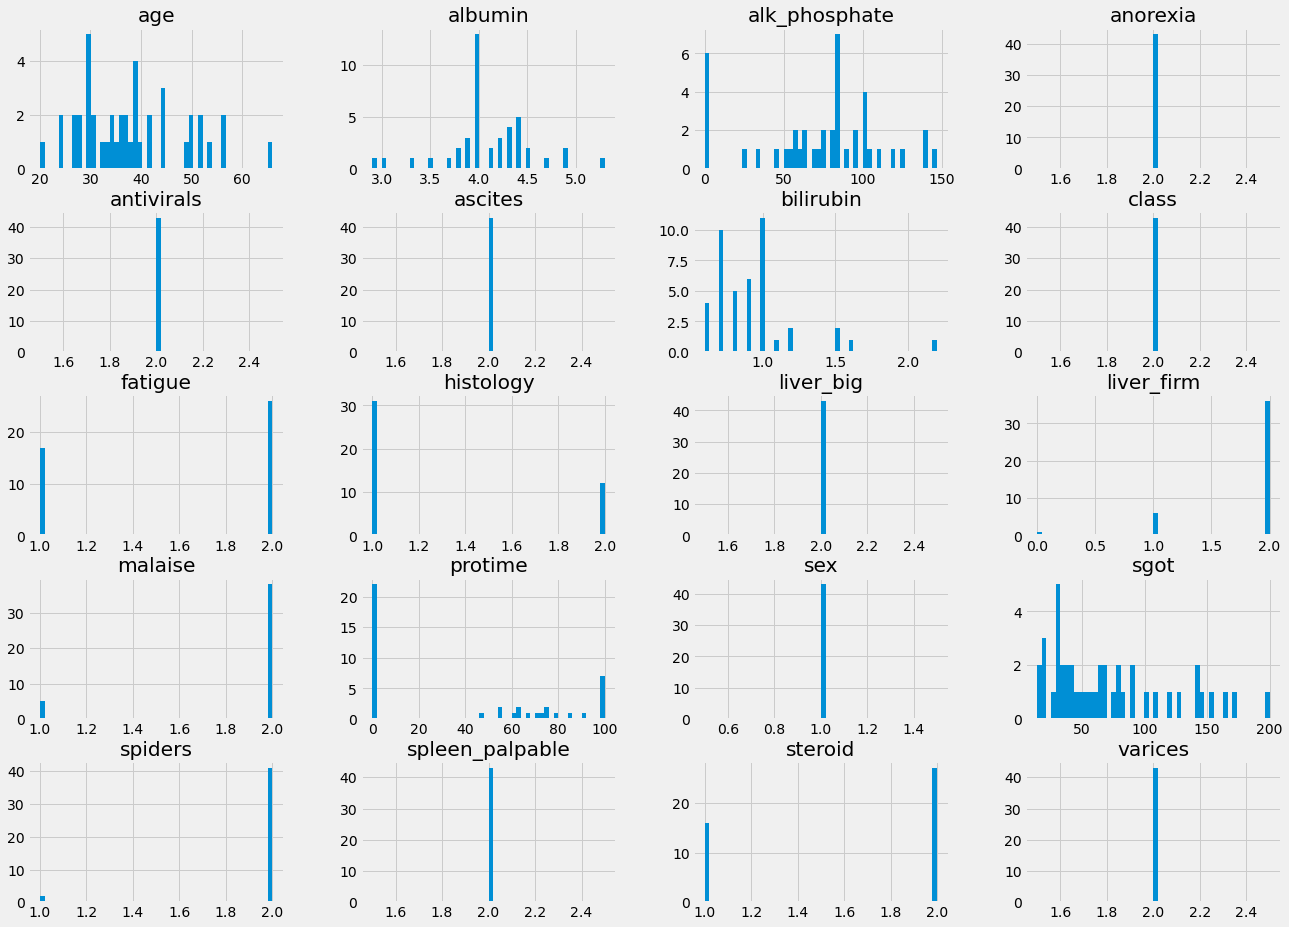

In [184]:
#show with outlier removal. 
df_no_outlier.hist(bins=50, figsize=(20, 15))
plt.show()

Looking at these histograms we understand that mass removal of outliers when we have a lot of binary features is a bad idea... essentially we'll end up removing the class with the lower number of counts in the set. NOT GOOD!!

We need a more bespoke method in this instance. e.g. initially we should remove 0 where 0 actually infers no record or nA. Once we have removed incorrect 0  we can carefully remove the outliers in teh none binary features. 

In [206]:
#Let's look at a couple of features 1) Protime, 2) alk_phosphate
df.protime.value_counts()
#After some research this is a value in seconds. We will assume that in this instance that 0 means the protime was 
# within healthy norms, 100 means that the protime was excessively above norms and anything in between was recorded as
# the actual time recorded. 

0      68
100    11
85      4
66      4
46      4
74      4
31      3
41      3
90      3
57      3
52      3
54      3
60      2
70      2
35      2
50      2
29      2
56      2
62      2
63      2
73      2
67      2
23      1
40      1
30      1
80      1
32      1
21      1
36      1
38      1
39      1
72      1
78      1
42      1
43      1
77      1
48      1
51      1
84      1
76      1
75      1
58      1
64      1
47      1
Name: protime, dtype: int64

In [208]:
df.alk_phosphate.value_counts()
#As per the protime results, we'll assume for now that values of 0 are not absence of a reading but that the recorded 
# value was inside healthy norms. 

0      29
85     18
62      4
81      4
78      3
       ..
123     1
125     1
126     1
127     1
92      1
Name: alk_phosphate, Length: 84, dtype: int64

## Feature Selection and Importance

+ SelectKbest
     - Strong relationship with the output / target
+ Recursive Feature Elimination

In [185]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [186]:
# Features and Labels
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [187]:
xfeature = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

ylabels = df["class"]

In [188]:
# using SelectKBest
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeature, ylabels)

In [190]:
# Highest score shows the best fit
print("Scores", best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [191]:
# Transform(optional)
bf_02 = best_feature_fit.transform(xfeature)

In [192]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [193]:
# Mapping scores to the feature names
feature_score = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [194]:
feature_score

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [197]:
feature_column_names = pd.DataFrame(xfeature.columns, columns=['Feature_name'])
best_feat_df = pd.concat([feature_score, feature_column_names], axis=1)

In [198]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [242]:
# Get the best n features
best_feat_df.nlargest(10, "Feature_Scores")

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


#### Recursive Feature Elimination

In [229]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [230]:
lr = LogisticRegression(verbose=1)

In [231]:
rfe = RFE(lr, n_features_to_select=8)

In [232]:
rfe.fit(xfeature, ylabels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

RFE(estimator=LogisticRegression(verbose=1), n_features_to_select=8)

In [233]:
selected_features = pd.DataFrame(rfe.support_, columns=["Selected_Features"])
ranked_features = pd.DataFrame(rfe.ranking_, columns=["Ranked_Features"])

In [239]:
rfe_feature_df = pd.concat([feature_column_names, selected_features, ranked_features], axis=1)

In [240]:
rfe_feature_df

,Feature_name,Selected_Features,Ranked_Features
0,age,False,9
1,sex,True,1
2,steroid,False,5
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


Narative
+ We will eliminate the features we features we don't want (indicated by selected=True, Ranked = 1)


Check Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [243]:
from sklearn.ensemble import ExtraTreesClassifier

In [244]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeature, ylabels)

ExtraTreesClassifier()

In [246]:
# Print Important
print(et_clf.feature_importances_)
#Higher the number the more important

[0.06130241 0.02307301 0.02722888 0.01245236 0.02479682 0.05612759
 0.0245857  0.04076012 0.05015377 0.04216159 0.0749287  0.09588292
 0.05311194 0.09805442 0.06834459 0.04971839 0.07889577 0.05924376
 0.05917727]


In [247]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeature.columns)

In [248]:
feature_importance_df

age                0.061302
sex                0.023073
steroid            0.027229
antivirals         0.012452
fatigue            0.024797
malaise            0.056128
anorexia           0.024586
liver_big          0.040760
liver_firm         0.050154
spleen_palpable    0.042162
spiders            0.074929
ascites            0.095883
varices            0.053112
bilirubin          0.098054
alk_phosphate      0.068345
sgot               0.049718
albumin            0.078896
protime            0.059244
histology          0.059177
dtype: float64

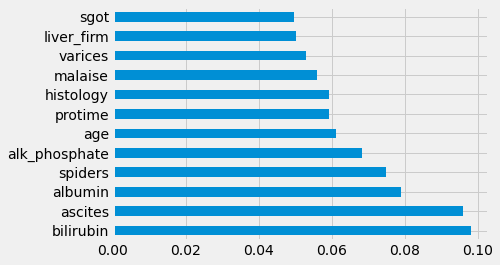

In [250]:
feature_importance_df.nlargest(12).plot(kind="barh")

Narrative

+ The different feature selection methods gave similar but not identical feature importances. To make a definitive list we could average across the different methods or use some domain knowledge. 

In [253]:
#Let's review correlations
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


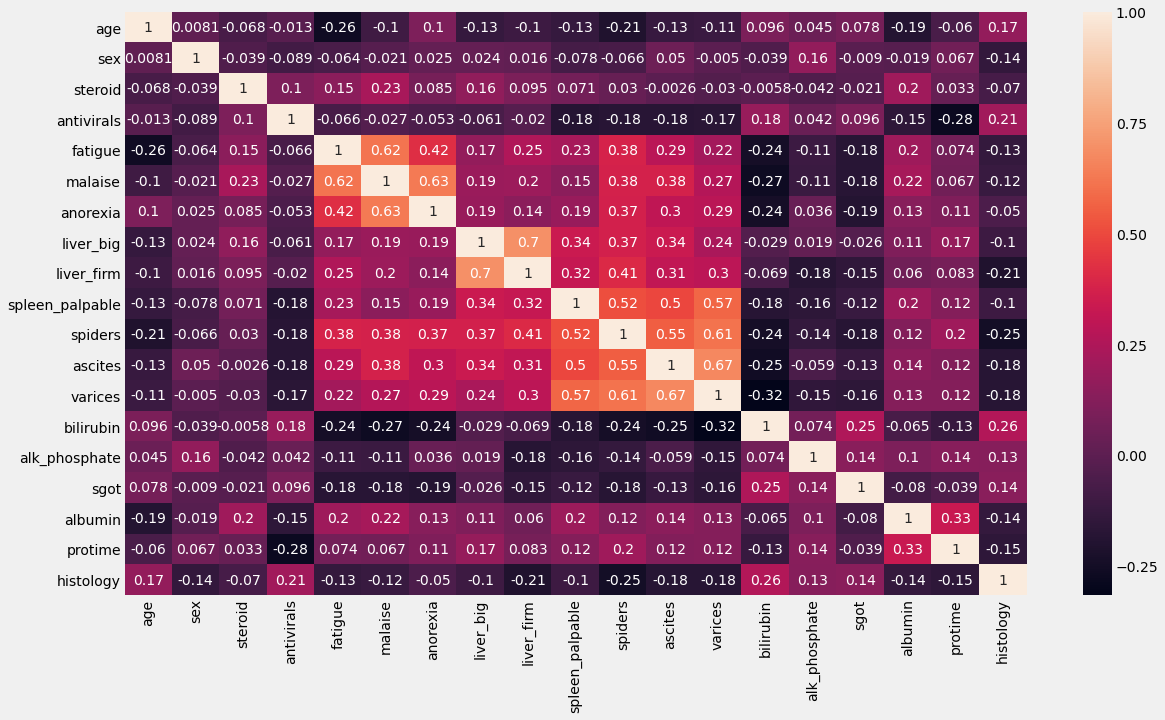

In [260]:
#plot the correlation as a heat map, this could also inform your feature selection. We can remove features that have 
#too strong a correlation. In this instance we may want to remove one of a pair of predictors that have a correlation
#greater than 0.6!!
plt.figure(figsize=(18,10))
sns.heatmap(xfeature.corr(), annot=True)
plt.show()

## Model Building

We'll investigate the following modelling tools:

+ features and labels
+ Train / Test / Split
+ logistic regression
+ decision trees
+ random forest
+ serialize

In [261]:
#Import Machine Learning Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [262]:
# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [522]:
from sklearn.metrics import confusion_matrix

In [272]:
# Selected Feature names from our selected features via selectKBest model
best_feat_df.nlargest(12, "Feature_Scores")['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [271]:
#Check all the columns for comparison
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [276]:
#let's add a few extra features to those selected by the model - we'll add sex, steroid, antivirals, 
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals', 'protime', 'sgot', 'bilirubin', 
                 'alk_phosphate', 'albumin','spiders', 'histology', 'fatigue', 'ascites', 'varices']]

In [555]:
#apply train / test split
#first apply to the features selected by the model
X_train, X_test, y_train, y_test = train_test_split(xfeature, ylabels, test_size=0.30, random_state=42)

#then apply to the manually selected features
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size=0.30, random_state=42)

### Model 1 = basic logistic regression

In [556]:
#Run a model on the initally selected features
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [557]:
#Model Accuracy
# Method 1 - get score from the logistic regression score function
logreg.score(X_test, y_test)

0.8297872340425532

In [558]:
#Method 2  - predict y_test using .predict
logreg.predict(X_test)

array([2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2])

In [559]:
print(list(y_test))

[2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


In [560]:
accuracy_score(y_test, logreg.predict(X_test))

0.8297872340425532

### Model 2 - logisitic regression with bespoke features and arguments

In [561]:
#Run a model on the features selected by mix of model and domain knowledge, and also we'll add some arg values
logreg_best = LogisticRegression(penalty = 'l1', solver = "liblinear", class_weight=None)
logreg_best.fit(X_train_b, y_train_b)

LogisticRegression(penalty='l1', solver='liblinear')

In [562]:
#Use built in score function to find accuracy
logreg_best.score(X_test_b, y_test_b)

0.851063829787234

In [563]:
y_pred_best = logreg_best.predict(X_test_b)
y_pred_best

array([2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2])

In [564]:
print(list(y_test_b))

[2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]


In [565]:
accuracy_score(y_test_b, y_pred_best )

0.851063829787234

In [566]:
confusion_matrix(y_test_b, y_pred_best )

array([[ 4,  5],
       [ 2, 36]])

### Make a prediction:

In [567]:
#predict for a single patient

# X_test
patient = X_test_b.iloc[23]

In [568]:
#Our model won't take a singe sample as it is expecting to see the full test set. We'll need to reshape. 
print(f'We predict your score will be {logreg_best.predict(np.array(patient).reshape(1, -1))[0]}')

We predict your score will be 2


### Model 3 Decision Tree

In [569]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 8, min_samples_split = 4, min_samples_leaf = 2, 
                            max_features = "log2", random_state = 42, max_leaf_nodes = 6)

In [570]:
clf.fit(X_train_b, y_train_b)

DecisionTreeClassifier(max_depth=8, max_features='log2', max_leaf_nodes=6,
                       min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [571]:
#Model accuracy score
clf.score(X_test_b, y_test_b)

0.7659574468085106

In [572]:
dt_pred = clf.predict(X_test_b)

In [573]:
confusion_matrix(y_test_b, dt_pred)

array([[ 1,  8],
       [ 3, 35]])

### Model 4 KNN
K-nearest neighbours

In [574]:
confusion matrix
[tn fp
 fn tp]

SyntaxError: invalid syntax (<ipython-input-574-e60ef41d2120>, line 1)

In [575]:
from sklearn.neighbors import KNeighborsClassifier

In [576]:
knn = KNeighborsClassifier(n_neighbors=5)

In [577]:
#Fit the classifier
knn.fit(X_train_b, y_train_b)

KNeighborsClassifier()

In [578]:
knn.score(X_test_b, y_test_b)

0.723404255319149

In [579]:
knn_pred = knn.predict(X_test_b)

In [580]:
confusion_matrix(y_test_b, knn_pred)

array([[ 0,  9],
       [ 4, 34]])

## Save the models
+ Serialization
+ Pickle
+ Joblib
+ numpy / json / ray

In [581]:
# Using Joblib to pickle our models for use in other programmes
import joblib

In [583]:
model_file = open("logistic_regression_hepB_model.pkl", "wb")
joblib.dump(logreg_best, model_file)
model_file.close()

In [584]:
model_file_knn = open("knn_hepB_model.pkl", "wb")
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [585]:
model_file_clf = open("dt_hepB_model.pkl", "wb")
joblib.dump(clf, model_file_clf)
model_file_clf.close()

In [586]:
!ls

data                                knn_hepB_model.pkl
dt_hepB_model.pkl                   logistic_regression_hepB_model.pkl
hepatitis_mortality_predcitor.ipynb


X

## Plot the Decision Tree

In [603]:
#Create a decision tree plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [604]:
feature_names_best = xfeatures_best.columns

In [605]:
target_names = ["Die", "Live"]

In [606]:
#Create a dot plot
dt_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_best, class_names=target_names)

In [607]:
#Draw a graph
graph = pydotplus.graph_from_dot_data(dt_data)

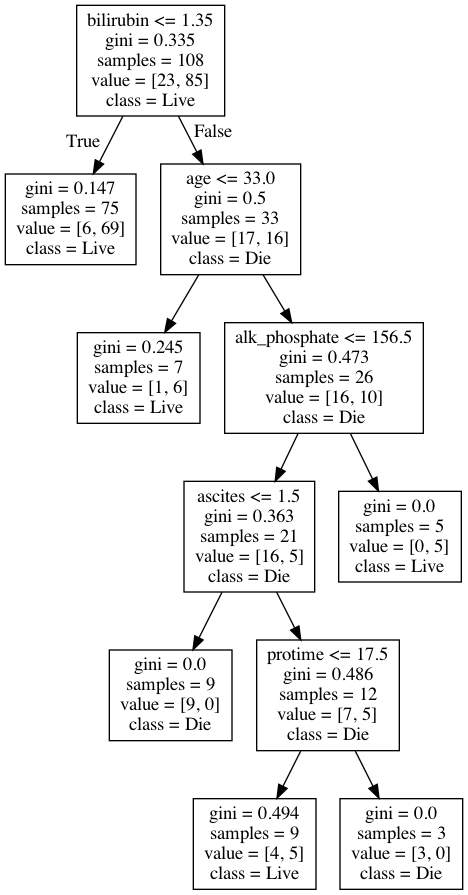

In [611]:

Image(graph.create_png())


In [612]:
#Save the decision tree plot
graph.write_png("hep_decision_tree_plot.png")

True

## Interpret and Evaluate the Models

+ Eli5
+ Lime
+ Shap
+ Skater

In [655]:
!pip install eli5

     |████████████████████████████████| 105 kB 3.6 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/envs/learn-env/bin/python -m pip install --upgrade pip' command.


In [620]:
# Interpreting with Lime
import lime
import lime.lime_tabular

In [621]:
# Lime Methods and Attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

Create Lime explainer
+ TabularExplainer = Tables
+ TextExplainer = Text
+ ImageExplainer = Images


In [622]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'protime', 'sgot', 'bilirubin',
       'alk_phosphate', 'albumin', 'spiders', 'histology', 'fatigue',
       'ascites', 'varices'],
      dtype='object')

In [623]:
target_names

['Die', 'Live']

In [624]:
class_names = ["Die(1)", "Live(2)"]

In [625]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_b.values, 
                                                   feature_names=feature_names_best, class_names=class_names, 
                                                   discretize_continuous=True)

In [650]:
patient = X_test_b.iloc[0]

logreg_best.predict(np.array(patient).reshape(1, -1))[0]

2

In [651]:
exp = explainer.explain_instance(patient, logreg_best.predict_proba, num_features=14, top_labels=1)

In [652]:
exp.show_in_notebook(show_table=True, show_all=False)

In [646]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [647]:
exp.as_list()

[('1.00 < histology <= 2.00', -0.4022795644622503),
 ('sex <= 1.00', -0.20348402396760074),
 ('1.00 < spiders <= 2.00', 0.19583593931451018),
 ('albumin <= 3.10', -0.1385842871072619),
 ('1.00 < fatigue <= 2.00', 0.09084531862506788),
 ('protime <= 0.00', 0.06683970834923776),
 ('age > 50.25', -0.04662612785539315),
 ('1.00 < bilirubin <= 1.55', 0.024503857645011968),
 ('alk_phosphate <= 57.75', -0.01901576904686512),
 ('54.50 < sgot <= 93.50', -0.01623057127631482),
 ('steroid <= 1.00', 0.0014063421241658817),
 ('varices <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0),
 ('ascites <= 2.00', 0.0)]

In [649]:
df.loc[2:3]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1


In [656]:
import eli5

Using TensorFlow backend.


In [660]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'protime', 'sgot', 'bilirubin',
       'alk_phosphate', 'albumin', 'spiders', 'histology', 'fatigue',
       'ascites', 'varices']

In [661]:
eli5.show_weights(logreg_best, top=10, feature_names=feature_names_best, target_names=class_names)

Weight?,Feature
+1.285,spiders
+1.053,sex
+0.485,albumin
+0.418,fatigue
+0.009,sgot
+0.002,alk_phosphate
-0.009,protime
-0.015,age
-0.636,bilirubin
-1.631,histology


In [666]:
eli5.show_prediction(logreg_best, X_test_b.iloc[12], feature_names=feature_names_best, target_names=class_names)

### Evaluation of the model
+ Confusion Matrix
+ Classification Report
+ Accuracy Score

#### Confusion Matrix. 


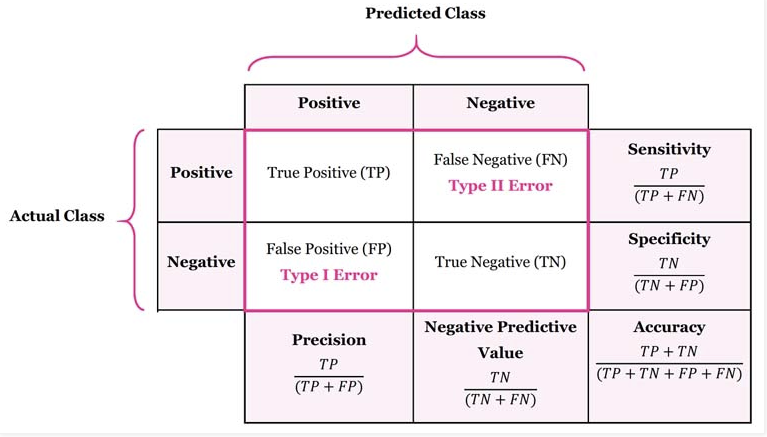

In [671]:
y_pred = logreg_best.predict(X_test_b)

In [672]:
# Accuracy Score
accuracy_score(y_test_b, y_pred)

0.851063829787234

In [673]:
confusion_matrix(y_test_b, y_pred)

array([[ 4,  5],
       [ 2, 36]])

In [674]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

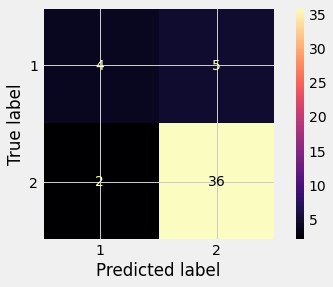

In [681]:
#plot the best logistic regression confusion matrix
plot_confusion_matrix(logreg_best, X_test_b, y_test_b, cmap="magma")

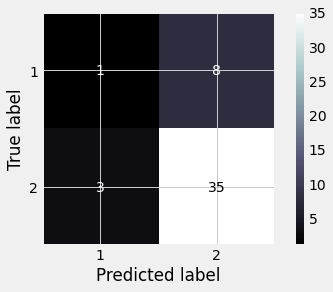

In [685]:
#Plot the decision tree confusion matrix
plot_confusion_matrix(clf, X_test_b, y_test_b, cmap='bone')

In [690]:
#We can specify each of the outcomes which can help to calculate other accuracy scores like f1 and specificity etc
tp, tf, fn, tn = confusion_matrix(y_test_b, y_pred).ravel()

In [692]:
tp

4

#### Classification Report

In [693]:
from sklearn.metrics import classification_report

In [695]:
print(classification_report(y_test_b, y_pred))
# We can see from the confusion matrices and the classification report that the "live" class metrics are good but 
# the "die" class metrics are poor. This would be expected from a data set with such a heavy imbalance. 

              precision    recall  f1-score   support

           1       0.67      0.44      0.53         9
           2       0.88      0.95      0.91        38

    accuracy                           0.85        47
   macro avg       0.77      0.70      0.72        47
weighted avg       0.84      0.85      0.84        47



In [699]:
#Imbalanced data size?
df["class"].value_counts()

2    123
1     32
Name: class, dtype: int64

In [701]:
class_names

['Die(1)', 'Live(2)']

In [712]:
#Add labels to the classification report!
print(classification_report(y_test_b, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.67      0.44      0.53         9
     Live(2)       0.88      0.95      0.91        38

    accuracy                           0.85        47
   macro avg       0.77      0.70      0.72        47
weighted avg       0.84      0.85      0.84        47



In [707]:
!pip install pandas_ml

     |████████████████████████████████| 100 kB 3.5 MB/s ta 0:00:011
You should consider upgrading via the '/opt/anaconda3/envs/learn-env/bin/python -m pip install --upgrade pip' command.


In [711]:
#Alternative is pandas_ml
import pandas_ml
from pandas_ml import confusion_matrix
# cm = ConfusionMatrix(y_test_b, y_pred)

AttributeError: module 'pandas_ml' has no attribute 'imbaccessors'